# **Global Surrogates**

De uma forma geral, surrogate é um modelo substituto. No contexto de interpretabilidade, o surrogate é um modelo caixa-branca que simula as predições de um modelo caixa-preta. Podemos pensar em modelos surrogates globais ou locais, quando se deseja simular as predições de um modelo para todo um conjunto de dados ou apenas para uma determinada região em torno de uma instância específica que se deseja explicar. Nesse notebook, apresentamos os modelos surrogates globais.

In [ ]:
 from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np



**READING THE DATA FRAME**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/datasets/statlog-heart-dataset.csv')

df.head()

,age,sex,chest,pressure,cholestoral,bloodsugar,electrocardiographic,heartRate,exInducedAngina,oldpeak,slope,numMajorVessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,yes
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,yes
2,56,1,3,130,256,1,2,142,1,0.6,2,1,6,yes
3,59,1,4,110,239,0,2,142,1,1.2,2,1,7,yes
4,60,1,4,140,293,0,2,170,0,1.2,2,2,7,yes


**TRAINING EXAMPLES**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


**--- LEARNING THE RF CLASSIFIER**

Aprendendo o modelo

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, Y_train)

Agora usando o modelo para gerar predições

In [ ]:
Yhat = rf.predict(X_test)

Yhat

array(['no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
       'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'yes', 'no', 'no'], dtype=object)

**--- BUILDING THE SURROGATE MODEL**

Note que no modelo surrogate os atributos preditores continuam os mesmos mas o atributo alvo agora é a predição do modelo base que se deseja explicar. Nesse exmeplo, abaixo uma árvore de decisão é aprendida usando as predições do modelo base para os dados de teste.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,min_samples_leaf = 10)

dt.fit(X_test, Yhat)




DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)

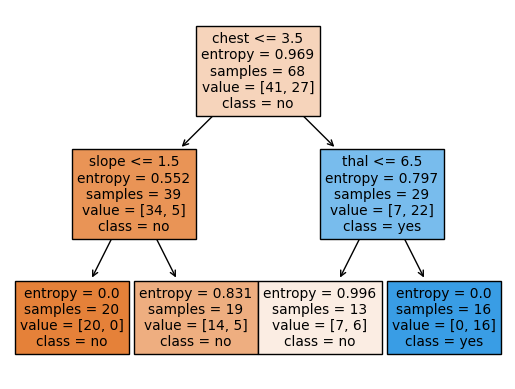

In [ ]:
from sklearn import tree


tree.plot_tree(dt, feature_names = X.columns, class_names=['no', "yes"],filled = True);

**Building the global surrogate from a cross-validation experiment**

In [ ]:
from sklearn.model_selection import cross_val_predict

rf = RandomForestClassifier()

Yhat = cross_val_predict(rf, X, Y, cv=10)

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2,min_samples_leaf = 10)

dt.fit(X, Yhat)


DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10)

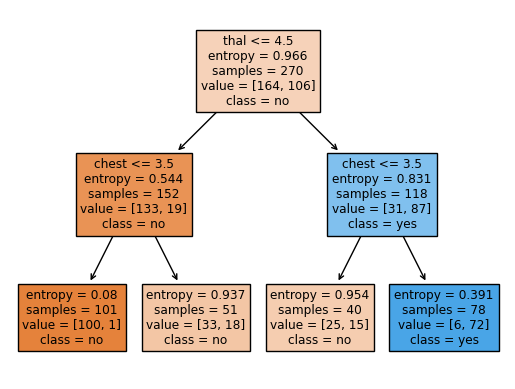

In [ ]:
tree.plot_tree(dt, feature_names = X.columns, class_names=['no', "yes"],filled = True);


Artificial Dataset - Blobs

In [ ]:
from sklearn.datasets import make_blobs

centers = [(0, 3), (3, 0)]

X, Y = make_blobs(n_samples=500, centers=centers, n_features=2,random_state=0)


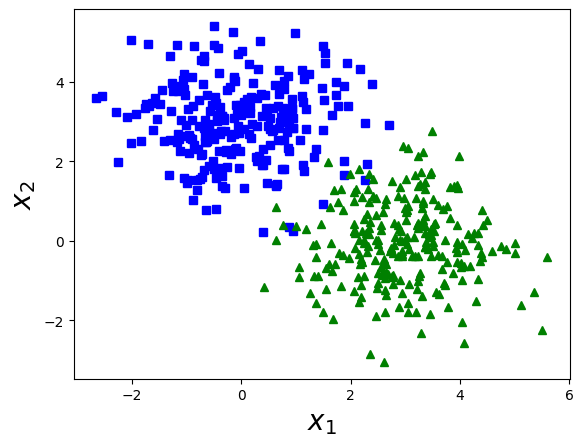

In [ ]:
from matplotlib import pyplot as plt

# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "bs")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()

Treinando RF com um conjunto de 100 instâncias de treinamento

In [ ]:
rf = RandomForestClassifier()

rf.fit(X,Y)

Yhat = rf.predict(X)



DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

Gerando um conjunto de teste e treinando o surrogate global

In [ ]:

centers = [(0, 3), (3, 0)]

X_test, Y_test = make_blobs(n_samples=500, centers=centers, n_features=2,random_state=0)

Yhat = rf.predict(X_test)



DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,min_samples_leaf = 10)

dt.fit(X_test, Yhat)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)

Gerando uma grande quantidade de dados para verificar qual a superfície de separação definida pelo modelo RF e pelo seu surrogate

In [ ]:
n = 5000
xy_min = [-2, -2]
xy_max = [6, 6]
data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))


Gerando as predições do modelo RF e plotando

In [ ]:
Yhat2 = rf.predict(data)

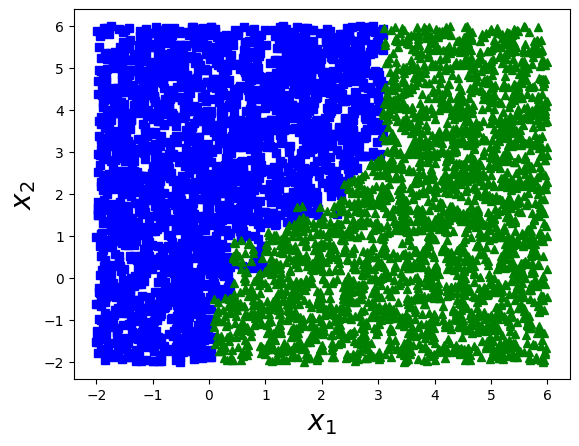

In [ ]:
# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(data[:, 0][Yhat2==0], data[:, 1][Yhat2==0], "bs")
plt.plot(data[:, 0][Yhat2==1], data[:, 1][Yhat2==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()

Gerando as predições do modelo surrogate e plotando

In [ ]:
Yhat3 = dt.predict(data)


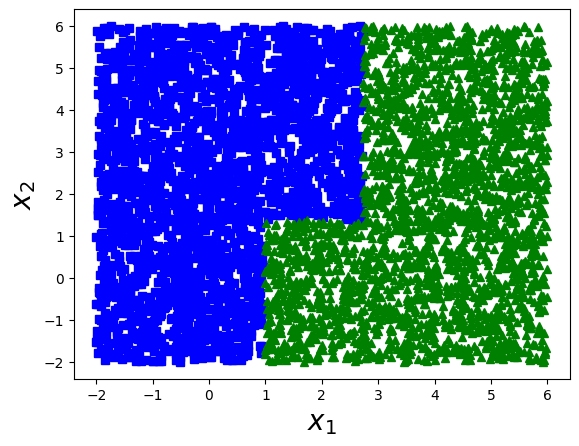

In [ ]:
# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(data[:, 0][Yhat3==0], data[:, 1][Yhat3==0], "bs")
plt.plot(data[:, 0][Yhat3==1], data[:, 1][Yhat3==1], "g^")


# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
#plt.xticks([])
#plt.yticks([])

# Displaying the plot.
plt.show()

Obs.: a fronteira de classe do surrogate é uma aproximação da fronteira do modelo RF original. Mudando a profundidade da árvore de decisão faz com que a fronteira do surrogate fique mais ou menos alinhada com a fronteira do modelo base.

COMENTÁRIOS

1. O surrogate simula as predições de um modelo base, independente de estarem corretas ou não.

2. Em alguns casos, é possível até ter um bom ajuste de um modelo caixa-preta, para algumas regiões de dados. Essa é a base para modelos locais como LIME.

3. Um nó terminal de uma árvore de decisão é valida para um grupo de instâncias. Nesse sentido pode se falar de explocações "glocais".